#  Credit Card Fraud Detection

![fraude](fraude.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Welcome" data-toc-modified-id="Welcome-0">Welcome</a></span></li><li><span><a href="#Dataset-description" data-toc-modified-id="Dataset-description-1">Dataset description</a></span></li><li><span><a href="#Important-libraries" data-toc-modified-id="Important-libraries-2">Important libraries</a></span></li><li><span><a href="#Loading-&amp;-understanding-our-data" data-toc-modified-id="Loading-&amp;-understanding-our-data-3">Loading &amp; understanding our data</a></span></li><li><span><a href="#Dropping-duplicates" data-toc-modified-id="Dropping-duplicates-4">Dropping duplicates</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-5">Correlation analysis</a></span></li><li><span><a href="#Fraud-Definition" data-toc-modified-id="Fraud-Definition-6">Fraud Definition</a></span></li><li><span><a href="#Fraud/-non-Fraud-ratio" data-toc-modified-id="Fraud/-non-Fraud-ratio-7">Fraud/ non-Fraud ratio</a></span></li><li><span><a href="#Class-imbalance-visual-representation" data-toc-modified-id="Class-imbalance-visual-representation-8">Class imbalance visual representation</a></span></li><li><span><a href="#Detecting-outliers" data-toc-modified-id="Detecting-outliers-9">Detecting outliers</a></span></li><li><span><a href="#Traditional-way-of-cathing-fraud:-Rules" data-toc-modified-id="Traditional-way-of-cathing-fraud:-Rules-10">Traditional way of cathing fraud: Rules</a></span></li><li><span><a href="#Machine-Learning-models" data-toc-modified-id="Machine-Learning-models-11">Machine Learning models</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-sets" data-toc-modified-id="Train-/-Test-sets-11.1">Train / Test sets</a></span></li><li><span><a href="#Hyperparameter-tunning-with-GridSearchCV" data-toc-modified-id="Hyperparameter-tunning-with-GridSearchCV-11.2">Hyperparameter tunning with GridSearchCV</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-11.2.1">Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-11.2.2">Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-11.2.3">Random Forest</a></span></li><li><span><a href="#Adaboost" data-toc-modified-id="Adaboost-11.2.4">Adaboost</a></span></li><li><span><a href="#Light-Gradient-Boosting" data-toc-modified-id="Light-Gradient-Boosting-11.2.5">Light Gradient Boosting</a></span></li></ul></li><li><span><a href="#Synthetic-Minority-Oversampling-Technique-(SMOTE)" data-toc-modified-id="Synthetic-Minority-Oversampling-Technique-(SMOTE)-11.3">Synthetic Minority Oversampling Technique (SMOTE)</a></span><ul class="toc-item"><li><span><a href="#Light-Gradient-Boosting-combined-with-Smote" data-toc-modified-id="Light-Gradient-Boosting-combined-with-Smote-11.3.1">Light Gradient Boosting combined with Smote</a></span><ul class="toc-item"><li><span><a href="#Roc_auc_score" data-toc-modified-id="Roc_auc_score-11.3.1.1">Roc_auc_score</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-11.3.1.2">Features importance</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Hybrid-Rule_Based-Machine-Learning-Model" data-toc-modified-id="Hybrid-Rule_Based-Machine-Learning-Model-12">Hybrid Rule_Based Machine Learning Model</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-12.1">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-12.2">References</a></span></li></ul></li></ul></div>

## Welcome

Hi, welcome to this noteboock!

I find that Fraud prevention analytics is an amazing field for data analysis, and I hope that at the end of this notebook you think the same and want to learn a bit more about it. 

The goal of this project are the following:

-To understand the concept of "Fraud". <br>
-To explain how fraud prevention analysts caught fraudulent transactions before Machine Learning(ML). <br>
-To develop a ML model with the highest recall value as possible. <br>

Sounds interesting, isn't it?

Let's start


## Dataset description

For this project we will use the dataset ([Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)) from Kaggle.

In the dataset we will find a total of 284.807 transactions made by credit card in two different days in September 2013,  where only 492 of them are marked as fraud. Fraudulent transactions represent only the 0.172% of the dataset that show us that the dataset is highly unbalanced. 

All the variables from the dataset are numeric and features from "V1" to "V28" are the result of PCA transformation (Due to privacy reasons we cannot have the information about the original variables). Only two feautures were not transformed with PCA: "Time" and "Amount". The feature "Class" is our target variable and it has two possible values:
    
    1= fraud
    0= non-fraud  

## Important libraries

In [1]:
#pandas and numpy
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#hyperparameters tuning
from sklearn.model_selection import GridSearchCV

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.base import BaseEstimator

#model performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline 
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from collections import Counter

#others
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from typing import Dict, Tuple


## Loading & understanding our data


In [2]:
df=pd.read_csv("Data/creditcard/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#According to the dataset description, the features from "V1" to "V28" are the result of PCA(Principal Components Analysis). 
#We know that features must be scaled before using this technique. 
#However the features "Time" and "Amount" are not scaled we should scaled them before continuing with our analysis. 

df['Amnt_sc'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_sc'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

#Now we have to drop from our dataset the features "Time" and "Amount":
df=df.drop(columns=['Amount', 'Time'],axis=1)


In [4]:
#I changed the features order in the dataset. I like having my target variable at the end of the dataset. 
list(df.columns) 
df = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amnt_sc','Time_sc','Class']]


In [5]:
#Understanding our data:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amnt_sc,Time_sc,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,3.202236e-16,-1.050379e-14,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,1.000002e+00,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,-1.996583e+00,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,-8.552120e-01,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,-2.131453e-01,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,9.372174e-01,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.642058e+00,1.000000


This first look to our data shows the present of some outliers that we will handle at a later stage

In [6]:
#data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   V1       284807 non-null  float64
 1   V2       284807 non-null  float64
 2   V3       284807 non-null  float64
 3   V4       284807 non-null  float64
 4   V5       284807 non-null  float64
 5   V6       284807 non-null  float64
 6   V7       284807 non-null  float64
 7   V8       284807 non-null  float64
 8   V9       284807 non-null  float64
 9   V10      284807 non-null  float64
 10  V11      284807 non-null  float64
 11  V12      284807 non-null  float64
 12  V13      284807 non-null  float64
 13  V14      284807 non-null  float64
 14  V15      284807 non-null  float64
 15  V16      284807 non-null  float64
 16  V17      284807 non-null  float64
 17  V18      284807 non-null  float64
 18  V19      284807 non-null  float64
 19  V20      284807 non-null  float64
 20  V21      284807 non-null  

As we mentioned before, all our feautures are numeric and we have no missing values. 

## Dropping duplicates

In [7]:
#Do we have duplicated values in our dataset?
df.drop_duplicates(inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amnt_sc,Time_sc,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,1.641931,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,1.641952,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,1.641974,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,1.641974,0


We have deleted 1081 duplicated observations

## Correlation analysis

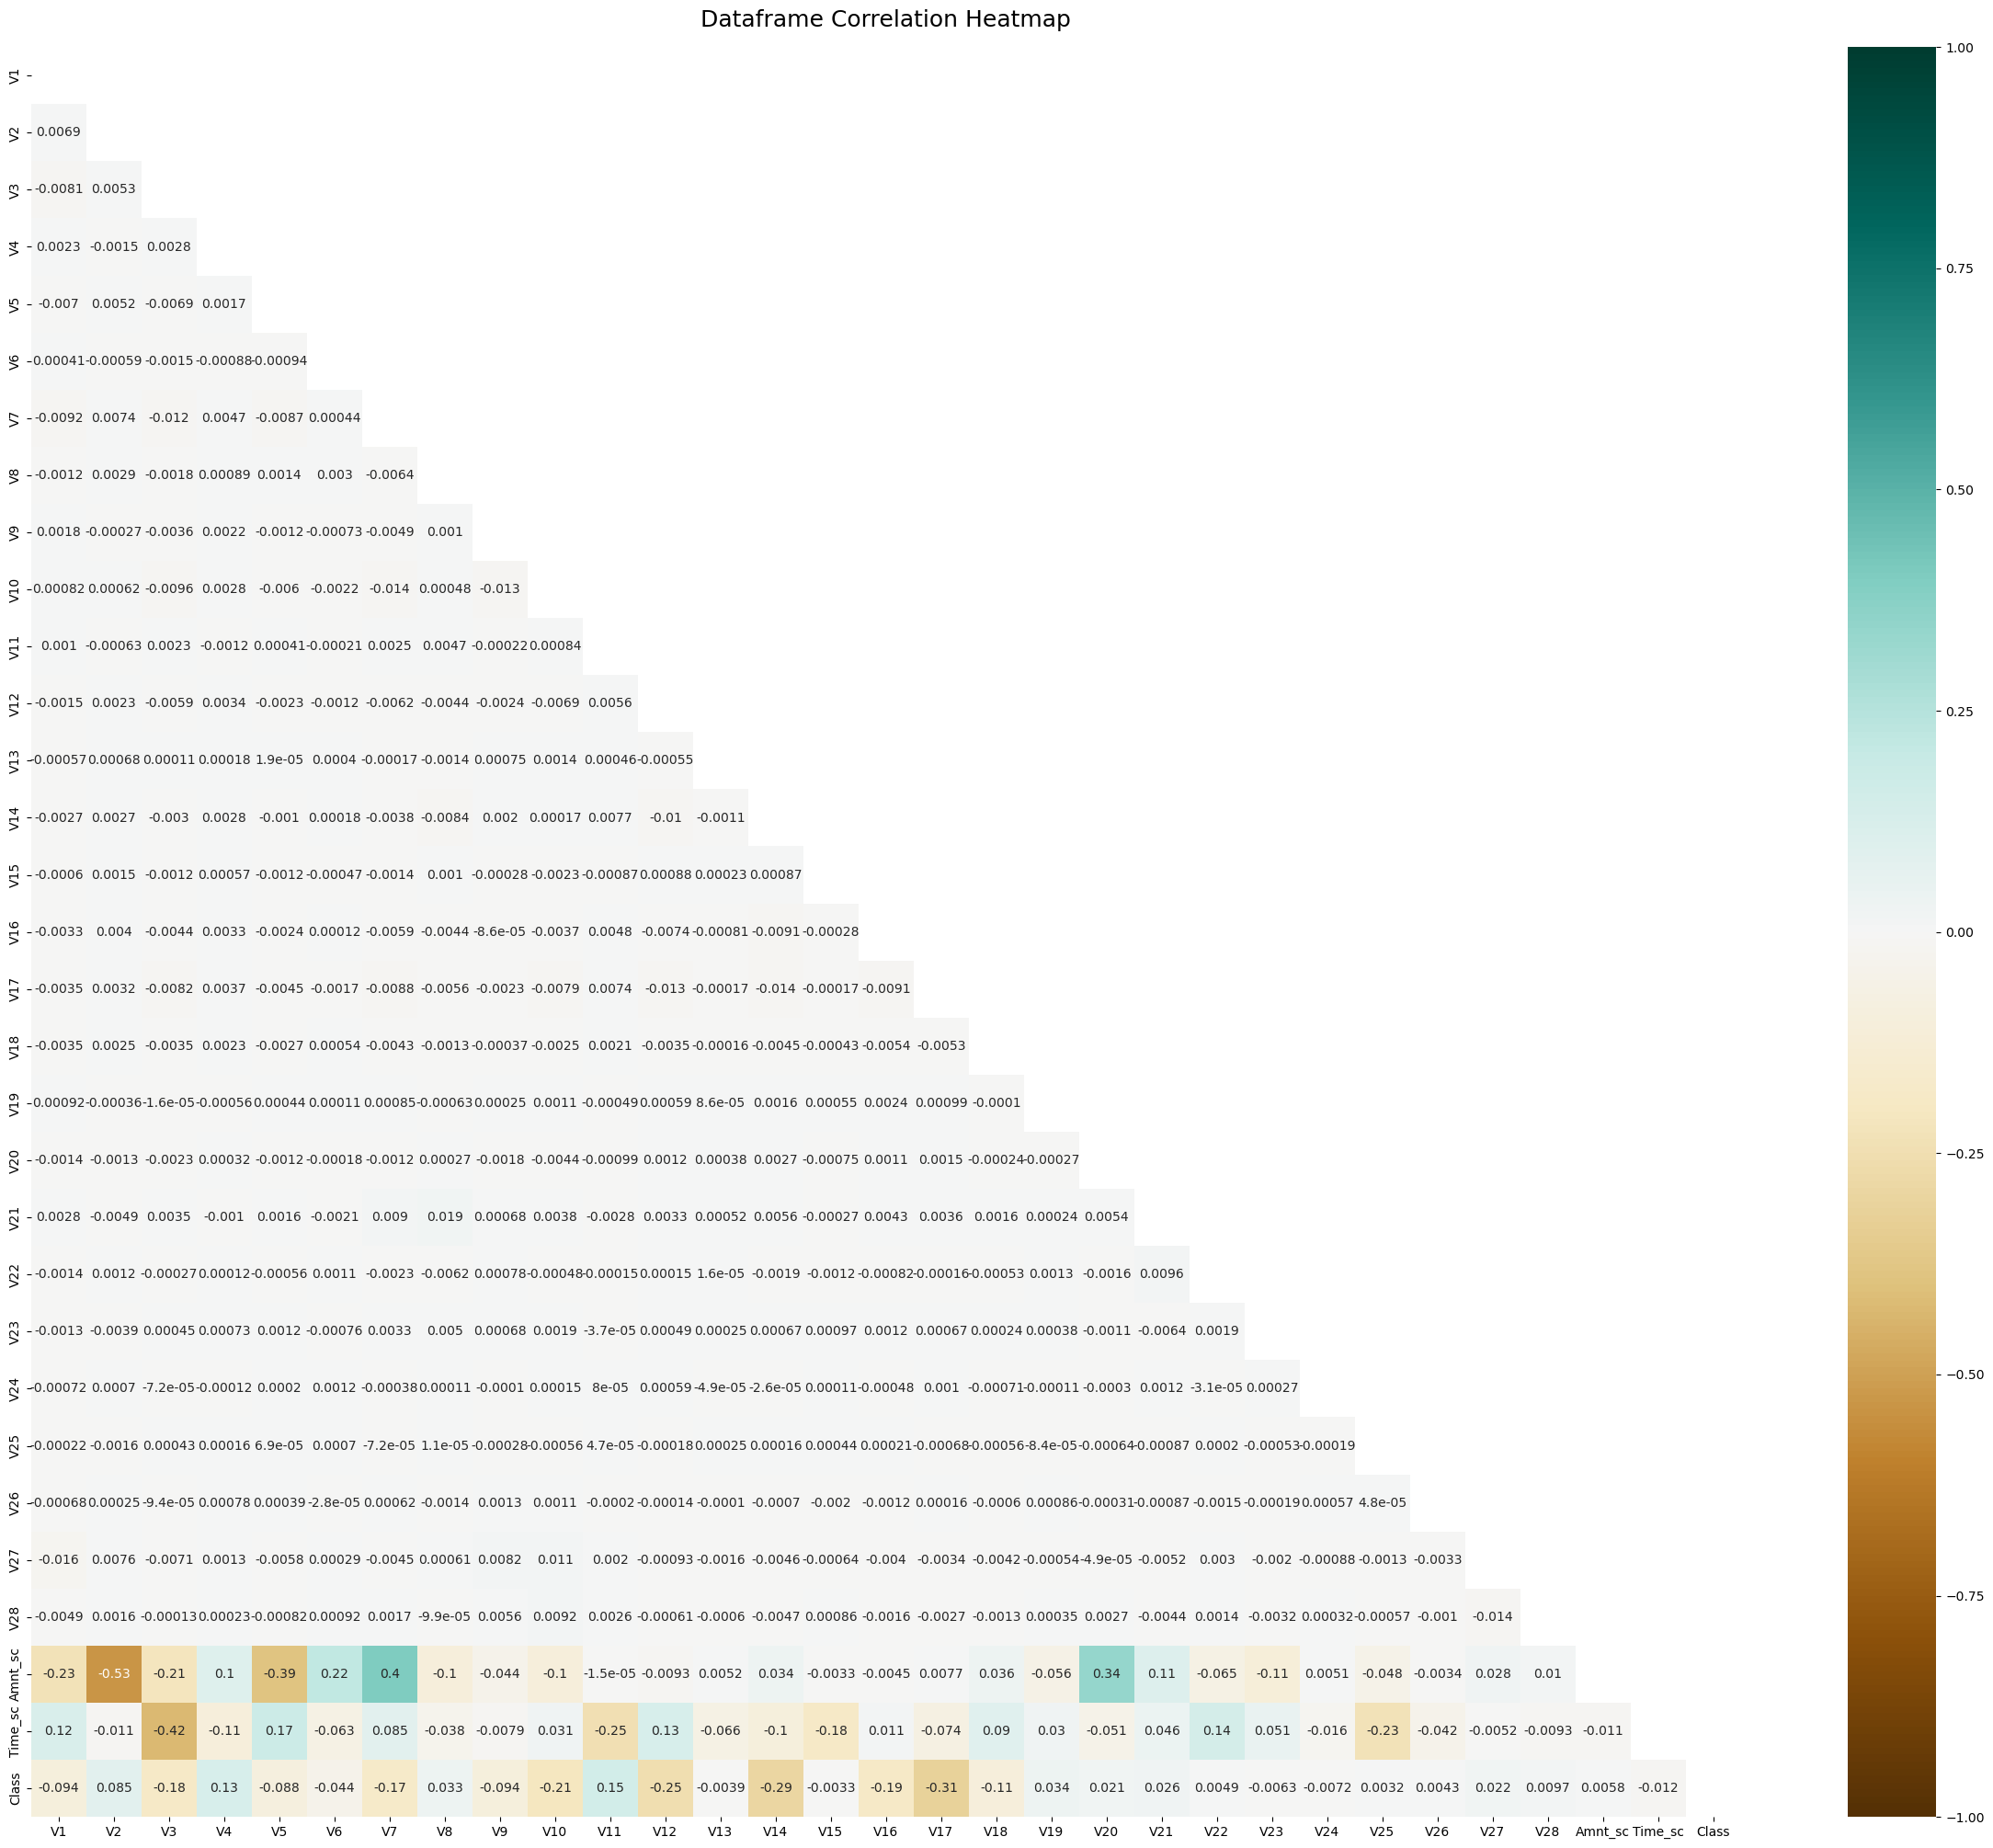

In [8]:
#Triangle Correlation Heatmap:

plt.figure(figsize=(30, 25))
corr=df.corr()
mask = np.triu(np.ones_like(corr))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Dataframe Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


As we can see in the  triangle heatmap there is not high correlation between our target variable "Class" and the other features. 

## Fraud Definition

We can definy fraud as 'a deliberately deceptive act used in online commerce to make illegal or unethically gains or deny victims' rights depending on developing technology and internet usage'. 

There are different type of frauds:cheque fraud, credit card fraud, BORIS and BOPIS fraud, criptocurrency fraud,insurance fraud,banking fraud, identity theft, acount takeover and so on. For each type of fraud, fraud prevention teams may have different approaches depending on the company's field and the fraud prevention team's goals. 

## Fraud/ non-Fraud ratio

In [9]:
# Let's calculate the ration of fraudulent and no fraudulent transactions:
y=df['Class'].value_counts()
y

0    283253
1       473
Name: Class, dtype: int64

In [10]:
#ratio:
y/len(df)

0    0.998333
1    0.001667
Name: Class, dtype: float64

As we already mentioned in the dataset description section. The dataset is highly imbalanced with only 0.001667% of fraudulent transactions. 

## Class imbalance visual representation

Text(0.5, 1.0, 'Class Distributions \n (0:Non_Fraud || 1: Fraud)')

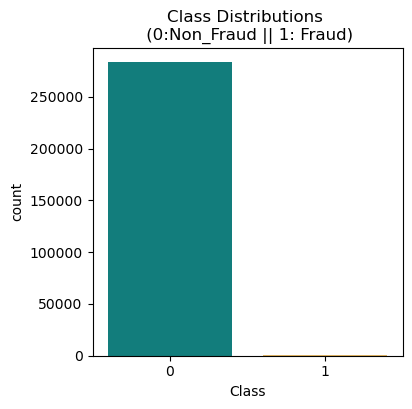

In [11]:
#Visualizations can be a very powerful tool to detect class imbalance. 
#We can use different kind of charts to this purpose:

# 1: Bar chart:
cls = ["#008F8D", "#F9BF51"]
sns.set_palette(sns.color_palette(cls))

fig,ax=plt.subplots(figsize=(4,4))

sns.countplot( data=df,x='Class')
plt.title('Class Distributions \n (0:Non_Fraud || 1: Fraud)', fontsize=12)

In [13]:
# 2: Scartter plot:

#First step: convert our dataframe in 2 variables:

X=df.iloc[:,0:30].values
y=df.Class.values


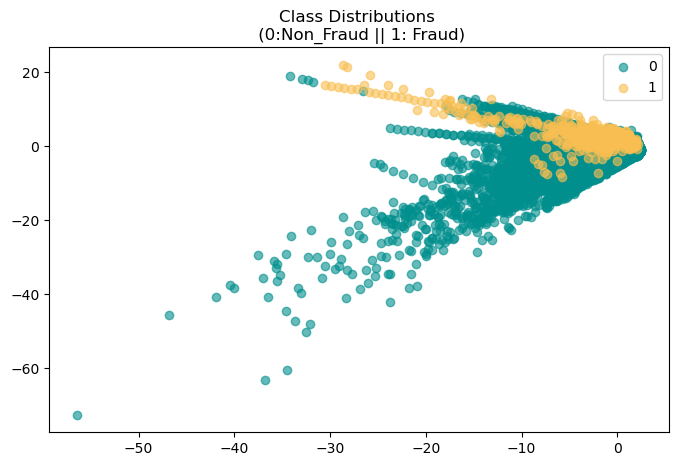

In [14]:
#Now, we can create our scatterplot:

plt.figure(figsize=(8,5))
counter = Counter(y)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha=0.6)
plt.legend()
plt.title('Class Distributions \n (0:Non_Fraud || 1: Fraud)', fontsize=12)
plt.show()

## Detecting outliers

An outlier is an observation with extreme value within our dataset.The present of outliers can affect the statistical measures like mean and standard deviation and the performance of some machile learning model's performance such as Logistic Regression. 

We can use a wide range of charts to detect outliers such as histograms, scatterplots or boxplots.

In this notebook, I will use the boxplot because I can create the boxplot for the whole dataset at the same time. 


<AxesSubplot:>

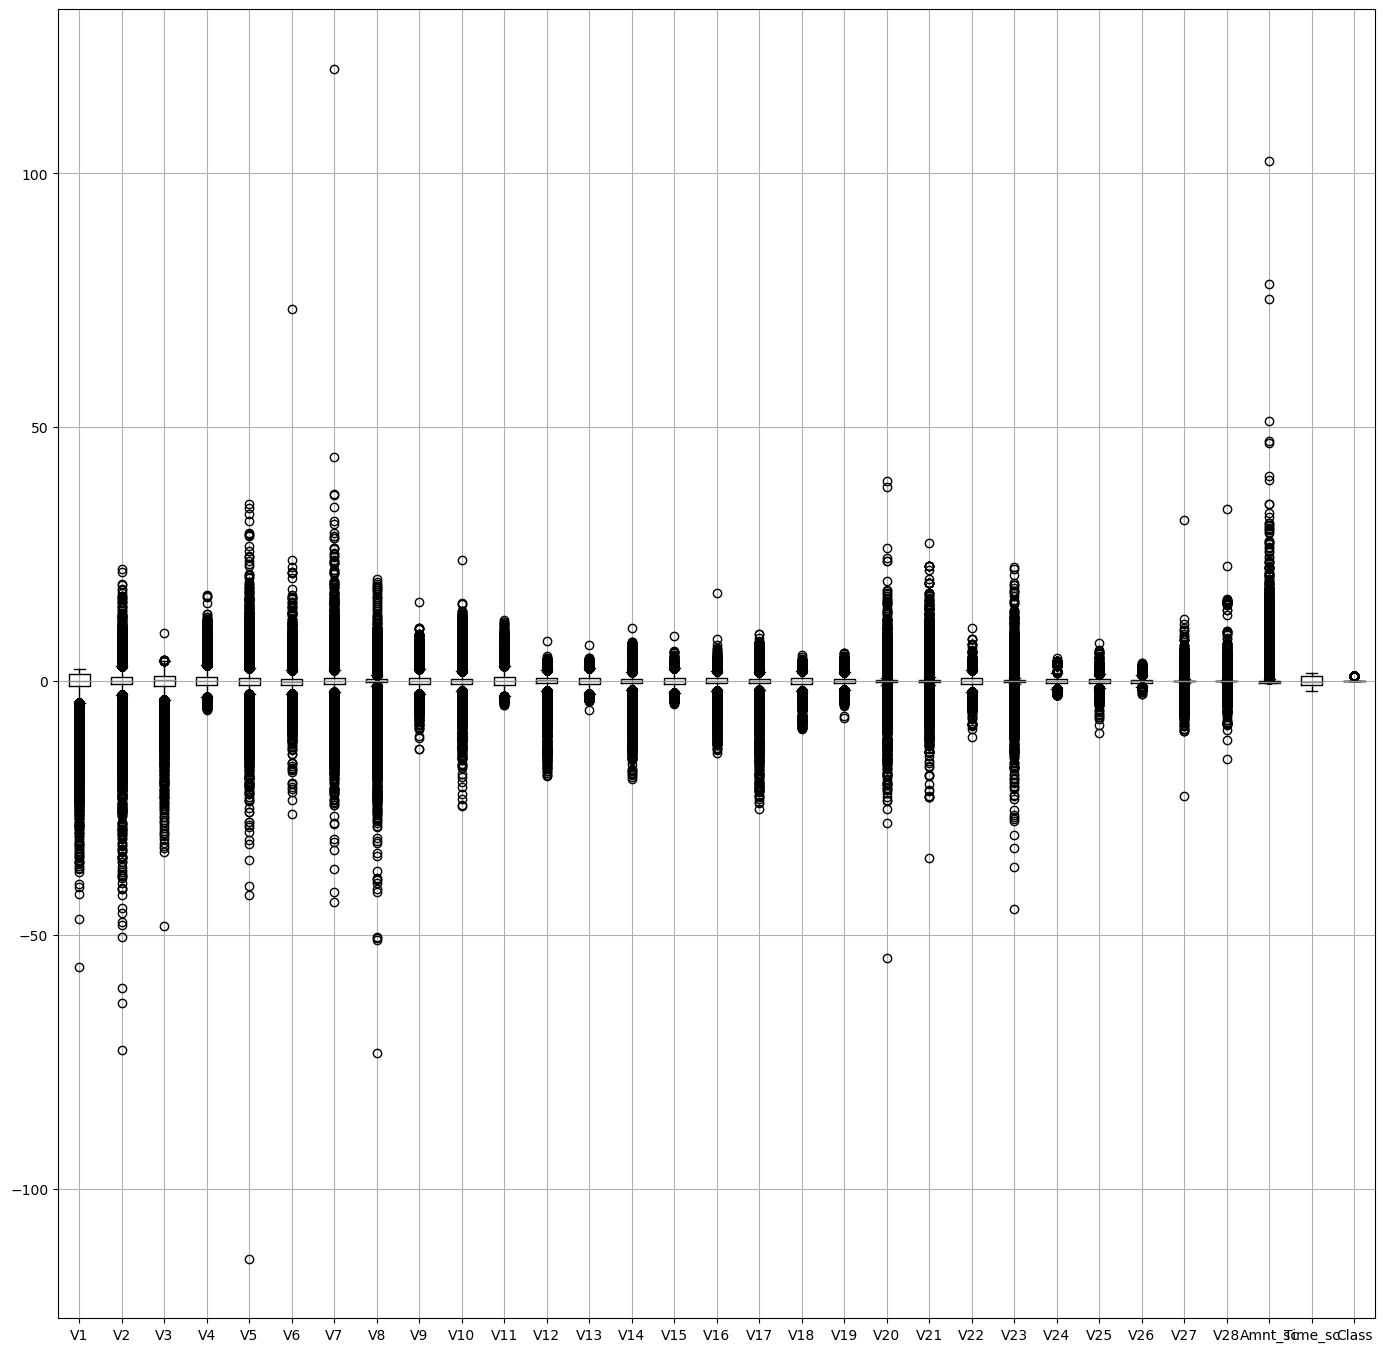

In [15]:

df.boxplot(figsize=(17,17))

as expected the boxplot confirms the present of outliers. 

Now that the presence of outliers is confirmed, we have to decide the best approach:

-Keep the outliers.<br>
-Cap the outliers: This technique sets a maximum and minimum limit for the outlier values. <br>
-Drop the outliers.<br>

From my point of view dropping outliers is not best option because we can lose valueable data, especially regarding fraudulent transanctions (remember the dataset has only 0.001667% of fraudulent transactions) this is why I will cap the outliers. 

In [16]:
#We define the function:

def outliers_cap(column):
    '''First we calculate the percentile 25 and the percentile 75. (In some tutorials, they can be named q1 and q3). 
    Once we have them we can calculate the interquartile range (IQR)'''
    
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75 - percentile25
    
    '''The outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR.
    With this information we can get our upper and lower limit '''
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    '''swe replace all values greater than the upper_limit by the upper_limit
     and all values smaller than the lower_limit by the lower_limit '''
    
    df[column] = np.where(df[column] > upper_limit,
                          upper_limit,
                          
                np.where( df[column] < lower_limit,
                         lower_limit,
                         df[column]

   )
        )

In [17]:
# We cap the outliers in every feature: 
outliers_cap('V1')
outliers_cap('V2')
outliers_cap('V3')
outliers_cap('V4')
outliers_cap('V5')
outliers_cap('V6')
outliers_cap('V7')
outliers_cap('V8')
outliers_cap('V9')
outliers_cap('V10')
outliers_cap('V11')
outliers_cap('V12')
outliers_cap('V13')
outliers_cap('V14')
outliers_cap('V15')
outliers_cap('V16')
outliers_cap('V17')
outliers_cap('V18')
outliers_cap('V19')
outliers_cap('V20')
outliers_cap('V21')
outliers_cap('V22')
outliers_cap('V23')
outliers_cap('V24')
outliers_cap('V25')
outliers_cap('V26')
outliers_cap('V27')
outliers_cap('V28')
outliers_cap('Amnt_sc')

<AxesSubplot:>

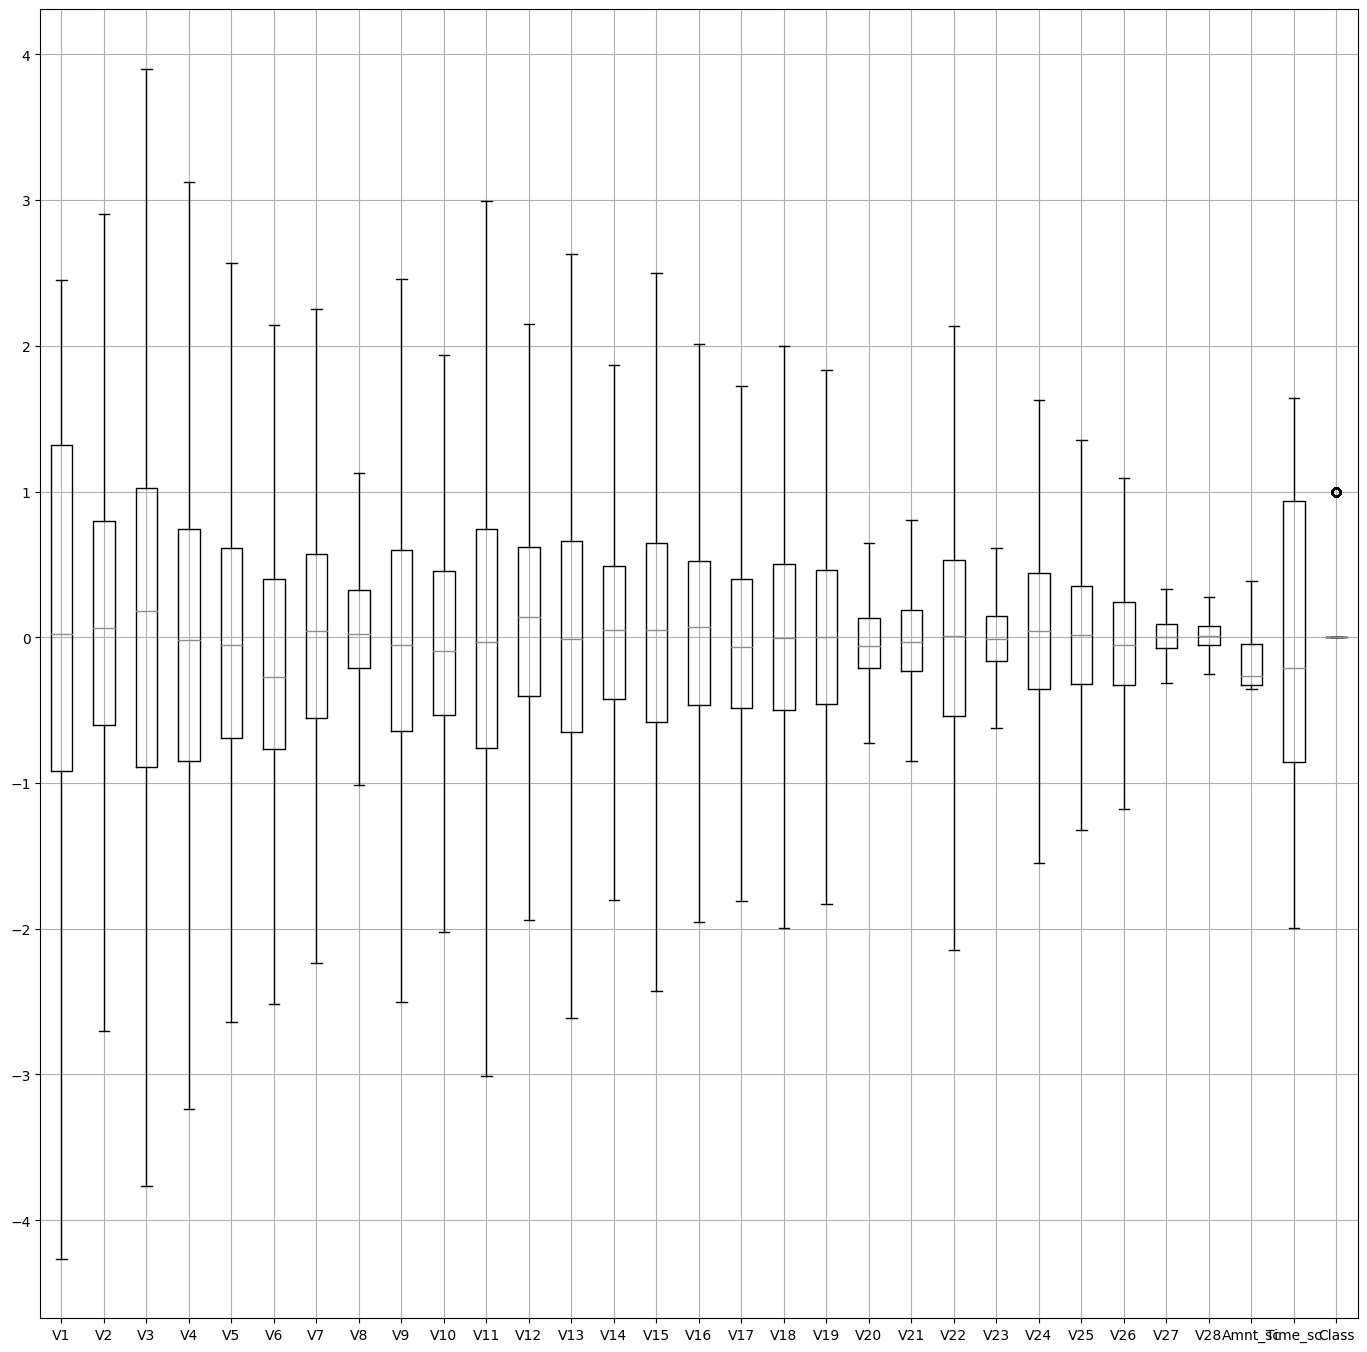

In [46]:
# We check again the boxplot 
df.boxplot(figsize=(17,17))

## Traditional way of cathing fraud: Rules 

Rules based system are the traditional way of catching fraudulent transactions. 

The idea of rules is very simple; we just need to create a rule that send to manual review any transaction above a certain amount or any transaction made in some locations.

We can set as many rules as we need, but keep in mind that some of them would result in a big number of false positives

Can we set rules in our dataset? Sure!

First we will define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on our features to detect fraud.


In [47]:
mean=df.groupby('Class').mean()

In [48]:
# pd.set_option('display.max_columns', None) allow us to see the value of all columns of the dataset. 

pd.set_option('display.max_columns', None)
mean

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amnt_sc,Time_sc
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.083504,0.043782,0.032687,-0.035049,0.000111,-0.090176,0.011982,0.067048,-0.014066,-0.028204,-0.006818,0.041878,-0.000401,0.025777,0.003564,0.015975,-0.003112,0.006642,-0.005080,-0.028282,-0.015701,0.001629,-0.004475,0.002508,0.003418,-0.004024,0.012771,0.011169,-0.145803,0.000446
1,-2.077658,1.838777,-2.863854,2.573613,-1.017917,-1.219615,-1.446837,0.391446,-1.570137,-1.656630,2.297595,-1.646066,-0.092224,-1.599695,-0.060141,-1.331159,-1.120919,-0.909678,0.488942,0.175096,0.351149,0.048702,-0.035764,-0.104628,0.058981,0.044304,0.141761,0.083164,-0.117502,-0.302462


In [49]:
# We will send to manual review all transactions from V1 that are  smaller than -2 and all transactions from V7 smaller than -1.

df['predicted_fraud'] = np.where(np.logical_and(df['V1'] < -2, df['V7'] < -1), 1, 0)

In [50]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases

print(pd.crosstab(df.Class, df.predicted_fraud, rownames=['Fraud'], colnames=['Predicted_Fraud']))

Predicted_Fraud       0     1
Fraud                        
0                274917  8336
1                   244   229


We got our first results!

using rules, we have detected 229 of 473 fraudulent cases, and we got 8336 false positives. Can Machine Learaning improve this result?

In [51]:
#I do not need the feature "flag as fraud" anymore, so I will delete it
df=df.drop(columns=['predicted_fraud'])

## Machine Learning models

In this section we will train and compare the results of 5 different ML models: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Adaboost Classifier and Light Gradient Boosting Classifier in order to find out which one is the most effective in detecting fraudulent transactions. 

Taking into account that our dataset is high unbalanced there are 3 different approaches that we could apply:

**Approach 1**: Ignore the imbalanced problem: In this case we cannot use "accuracy" to comparte the model performance but we can use other metrics instead such as "roc_auc","confussion matrix", "precision", "recall" or "f1". <br>

**Approach 2**: Oversampling the minotiry class using SMOTE until both clases are equally represented. <br>

**Approach 3**: Undersampling the mayority class until both classes are equally represented.<br>

In this notebook we will follow the first approach to find out base model and we will see if we can improve the results using SMOTE. 

As our goal is to find the model with the best recall score, we will use recall as our main metric. 


### Train / Test sets

In [52]:
# XY split:

X=df.drop('Class', axis=1)
y=df.Class


In [53]:
#Create training and test set:
# Note:The argument 'stratify=y' keeps the proportion of fraudulent transactions. 

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=42, stratify=y)


In [54]:
models = {
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Adaboost Classifier" :AdaBoostClassifier(),
   "Light Gradient Boosting" :LGBMClassifier()
    
      
}


# Cross validation score for different classifiers using "recall" as scoring:

for key, model in models.items():
    model.fit(X_train,y_train)
    score = cross_val_score(model, X, y, scoring='recall',cv=5)
    print(f'{key} model recall score:{round(score.mean(), 2)}')

Logisitic Regression model recall score:0.76
Decision Tree model recall score:0.68
Random Forest Classifier model recall score:0.78
Adaboost Classifier model recall score:0.6
Light Gradient Boosting model recall score:0.55


Random Forest Classifier is the algorithm with the highest recall value:0.78.

In [55]:
#Let's see how many fraud cases we can detect with random forest:

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)


In [56]:
print("Classification report for the test set")
print(classification_report(y_test,y_pred))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.97      0.74      0.84       142

    accuracy                           1.00     85118
   macro avg       0.99      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118



Random Forest Confusion matrix for the test set
[[84973     3]
 [   37   105]]


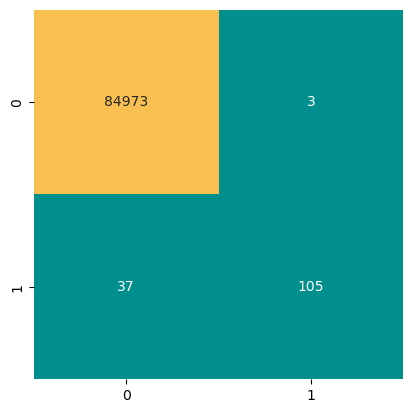

In [57]:
print("Random Forest Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

We can see that **Random Forest** model detects 105 of 142 fraudulent cases and we have only 3 falses positives. 

In Fraud analysis we have to find the balance between catching the maximum number of fraudulent transactions( this means to optimize the recall score) and keeping the number of false positives as low as possible. 

In this scenario a high number of falses positives would represents extra workload for Fraud Deparment because they have to review manually thousands of card transactions, and for Customer Service Department,since they have to deal with the customer's complaints whose transactions have been tagged as fraudulent by mistake.That is why it is important to keep the number of false positives as low as possible.  


Let's see if we can improve these results by tunning the hyperparameters of our model 


### Hyperparameter tunning with GridSearchCV




Exhaustive search over specified parameter values for an estimator. 

#### Logistic Regression

In [58]:

logreg_hyperparameters = {"penalty": ['l2', 'l1'], 
                          'C': [0.01,1,10,100],
                         "solver":['liblinear','saga']}


search=GridSearchCV(LogisticRegression(), logreg_hyperparameters, scoring='recall',n_jobs=-1,cv=5)
result_logreg=search.fit(X_train, y_train)


In [59]:
print('Best Recall Score of Logistic Regression model: %s' % result_logreg.best_score_)
print('Best Hyperparameters of Logistic regression Model: %s' % result_logreg.best_params_)


Best Recall Score of Logistic Regression model: 0.7795115332428766
Best Hyperparameters of Logistic regression Model: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


#### Decision Tree

In [60]:
hyperparameters = {"criterion": ["gini", "entropy"],
                   "max_depth":list(range(2,4,1)), 
                   "min_samples_leaf": list(range(5,7,1))}

search = GridSearchCV(DecisionTreeClassifier(), hyperparameters,scoring='recall', n_jobs=-1, cv=5)
result_dtc=search.fit(X_train, y_train)


In [61]:
print('Best Recall Score of Decision Tree model: %s' % result_dtc.best_score_)
print('Best Hyperparameters of Decision Tree model: %s' % result_dtc.best_params_)


Best Recall Score of Decision Tree model: 0.7765264586160108
Best Hyperparameters of Decision Tree model: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}


#### Random Forest

In [62]:
rfc_hyperparameters = {'n_estimators': [1,30,60,100],
              'max_features': ['sqrt', 'log2'], 
              'max_depth': [2,4,8,10],
              'criterion': ['gini', 'entropy','log_loss']}


search = GridSearchCV(RandomForestClassifier(), rfc_hyperparameters, scoring='recall', n_jobs=-1, cv=5)
result_rfc=search.fit(X_train, y_train)


In [63]:
print('Best Recall Score of Random Forest model: %s' % result_rfc.best_score_)
print('Best Hyperparameters of Random Forest model: %s' % result_rfc.best_params_)

Best Recall Score of Random Forest model: 0.7764360018091361
Best Hyperparameters of Random Forest model: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 60}


#### Adaboost

In [64]:
ada_hyperparameters = {'n_estimators': [1,30,60,100], 
                       'learning_rate': [0.01,0.1,0.2,0.5]}


search = GridSearchCV(AdaBoostClassifier(), ada_hyperparameters, scoring='recall', n_jobs=-1, cv=5)
result_ada=search.fit(X_train, y_train)

In [65]:
print('Best Recall Score of Adaboost model: %s' % result_ada.best_score_)
print('Best Hyperparameters of Adaboost model: %s' % result_ada.best_params_)

Best Recall Score of Adaboost model: 0.7341022161917684
Best Hyperparameters of Adaboost model: {'learning_rate': 0.5, 'n_estimators': 100}


#### Light Gradient Boosting

In [66]:
lgb_hyperparameters = {"n_estimators":[1,30,60,100],
                      "max_depth":[2,4,6,8],
                      "learning_rate":[0.01,0.1,0.2,0.5],
                      "min_data_in_leaf":[10,20,30],
                     "subsample" : [0.1,0.2,0.5,0.9]}

search = GridSearchCV(LGBMClassifier(), lgb_hyperparameters, scoring='recall', n_jobs=-1, cv=5)
result_lgb=search.fit(X_train, y_train)


[LightGBM] [Warning] Unknown parameter: min_samples_leaf


In [67]:
print('Best Recall Score of Light Gradient Boosting model: %s' % result_lgb.best_score_)
print('Best Hyperparameters of Light Gradient Boosting model: %s' % result_lgb.best_params_)

Best Recall Score of Light Gradient Boosting model: 0.8430122116689281
Best Hyperparameters of Light Gradient Boosting model: {'learning_rate': 0.5, 'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 1, 'subsample': 0.1}


Light Gradient Boosting is the model with the highest recall score. Let's apply the parameters values to our Light Gradient Boosting model.

In [68]:
lgbc = LGBMClassifier(learning_rate= 0.5,max_depth= 8,
                     min_samples_leaf= 10,n_estimators= 1, 
                      subsample= 0.1)

result_lgbc=lgbc.fit(X_train, y_train)

y_pred_lgbc=result_lgbc.predict(X_test)
y_pred_probs_lgbc = result_lgbc.predict_proba(X_test)[:,1]

In [69]:
print("Classification report for the test set")
print(classification_report(y_test,y_pred_lgbc))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.48      0.82      0.61       142

    accuracy                           1.00     85118
   macro avg       0.74      0.91      0.80     85118
weighted avg       1.00      1.00      1.00     85118



After the hyperparameter tunning **Light Gradient Boosting** is our best model with a recall score of 0.82. 



Light Gradient Boosting Confusion matrix for the test set after hyperparameter tunning
[[84851   125]
 [   26   116]]


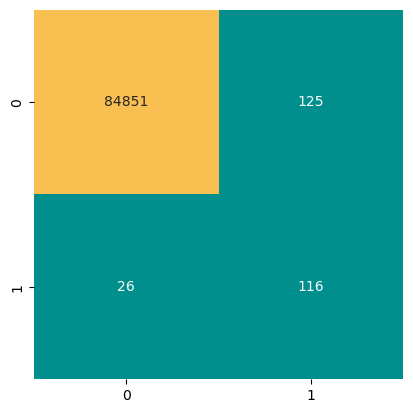

In [70]:
print("Light Gradient Boosting Confusion matrix for the test set after hyperparameter tunning")
print(confusion_matrix(y_test,y_pred_lgbc))
conf_mat = confusion_matrix(y_test,y_pred_lgbc)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

Light Gradient Boosting is our base model. We can detect 116 of 142 fraudulent transactions with 125 false positives. 
Let's see if we can improve this result!

### Synthetic Minority Oversampling Technique (SMOTE)

We will balance the dataset using the Synthetic Minority Over-sampling Technique,also known as SMOTE.<br> 
Smote creates new synthetic observations that are very similar to the existing observations in the minority class of the dataset. 

In [71]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (283726, 30)
y shape: (283726,)


In [72]:
# Define the resampling method
method = SMOTE(random_state=42)


In [73]:
# Create the resampled feature set. 
#Important: We oversample only the training set. 

X_sm, y_sm = method.fit_resample(X_train, y_train)


In [74]:
# We confirm we have the same number of non-fraudulent and frauduent transactions.

pd.value_counts(pd.Series(y_sm))

0    198277
1    198277
Name: Class, dtype: int64

<AxesSubplot:title={'center':'SMOTE Class Distributions \n (0:Non_Fraud || 1: Fraud)'}>

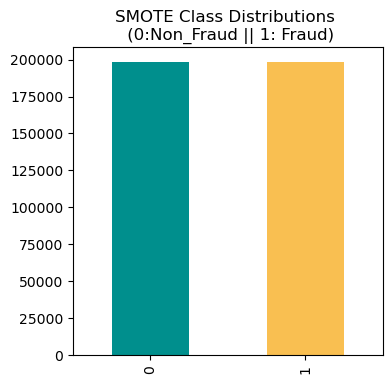

In [75]:
# We can confirm the data is balanced by plotting a bar chart. 

plt.figure(figsize=(4,4))

X_columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amnt_sc','Time_sc']
y_columns= df = ['Class']


df_sm = pd.concat([pd.DataFrame(X_sm, columns=X_columns), pd.DataFrame(y_sm, columns=y_columns)], axis=1)

df_sm.Class.value_counts().plot(kind='bar', title='SMOTE Class Distributions \n (0:Non_Fraud || 1: Fraud)',color=cls)

#### Light Gradient Boosting combined with Smote

As we decided in the previous section, Light Gradient Boosting is our base model. 

Let's apply SMOTE to the model and see the results.

In [85]:

lgbc_sm = LGBMClassifier(learning_rate= 0.5,max_depth= 8,
                     min_samples_leaf= 10,n_estimators= 1, 
                      subsample= 0.1)

result_lgbc_sm=lgbc_sm.fit(X_sm, y_sm)

y_pred_lgbc_sm=result_lgbc_sm.predict(X_test)
y_pred_probs_lgbc_sm = result_lgbc_sm.predict_proba(X_test)[:,1]

[LightGBM] [Warning] Unknown parameter: min_samples_leaf


In [86]:
print("Classification report for the test set")
print(classification_report(y_test,y_pred_lgbc_sm))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.06      0.96      0.11       142

    accuracy                           0.97     85118
   macro avg       0.53      0.97      0.55     85118
weighted avg       1.00      0.97      0.99     85118



Gradient Boosting Confusion matrix for the test set after hyperparameter tunning
[[82728  2248]
 [    5   137]]


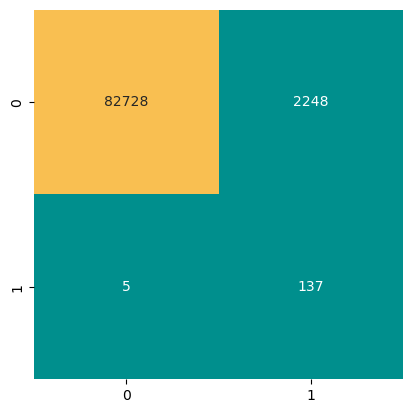

In [87]:
print("Gradient Boosting Confusion matrix for the test set after hyperparameter tunning")
print(confusion_matrix(y_test,y_pred_lgbc_sm))
conf_mat = confusion_matrix(y_test,y_pred_lgbc_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

The Light Gradient Boosting combined with Smote is able to detect 137 of 142 fraudulent transactions. (96% recall of the minority class). On the other hand, we need to take into account that Smote increases the number of false positive. I our case, we get an acceptable number of false positives. 

Let's know our model a bit more!



##### Roc_auc_score

In [88]:
print("roc_auc_score of Gradient Boosting classifier: ",roc_auc_score(y_test,y_pred_probs_lgbc_sm ))

roc_auc_score of Gradient Boosting classifier:  0.9864404962063854


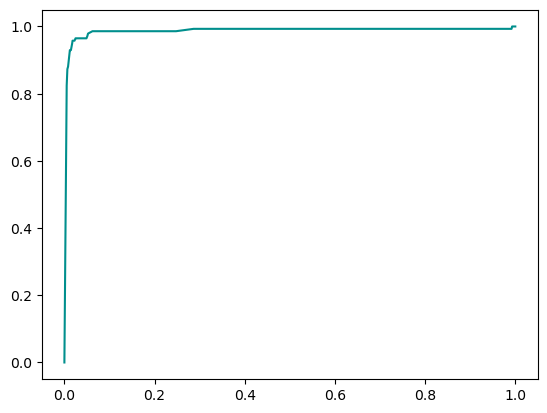

In [89]:

#gradient boosting
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_lgbc_sm )
auc = round(roc_auc_score(y_test, y_pred_probs_lgbc_sm), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))


##### Features importance

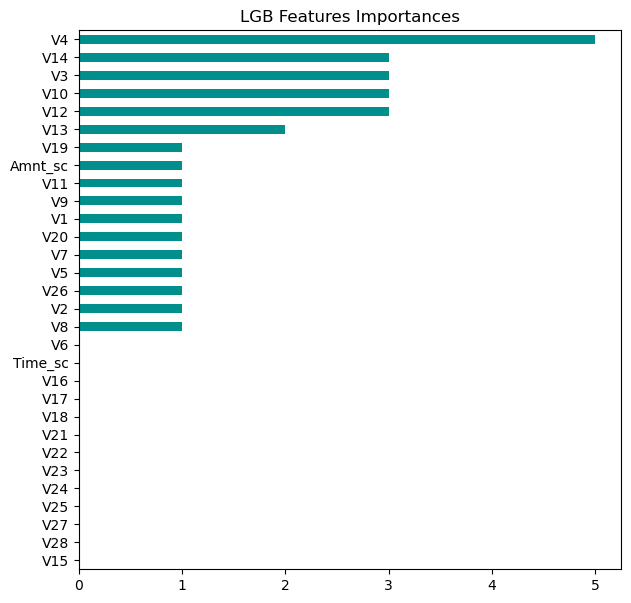

In [90]:
# Create a pd.Series of features importances
importances = pd.Series(data=lgbc_sm.feature_importances_,
                        index= X_sm.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#008F8D')
plt.title('LGB Features Importances')
plt.show() 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=12)

resampling = SMOTE()
model  = LGBMClassifier()

pipeline_lgbc= Pipeline([('SMOTE', resampling), ('Light Gradient Boosting', model)])


    
pipeline_lgbc.fit(X_train, y_train) 
y_pred_lgbc = pipeline_lgbc.predict(X_test)
y_pred_probs_lgbc = pipeline_lgbc.predict_proba(X_test)[:,1]



print('Classifcation report:\n', classification_report(y_test, y_pred_lgbc))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.51      0.85      0.64       142

    accuracy                           1.00     85118
   macro avg       0.76      0.93      0.82     85118
weighted avg       1.00      1.00      1.00     85118



Light Gradient Boosting combined with Smote Confusion matrix 
[[84862   114]
 [   21   121]]


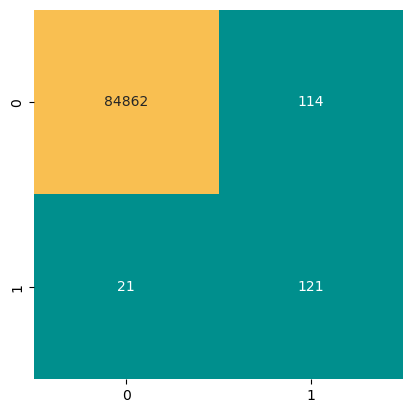

In [83]:
print("Light Gradient Boosting combined with Smote Confusion matrix ")
print(confusion_matrix(y_test,y_pred_lgbc))
conf_mat = confusion_matrix(y_test,y_pred_lgbc)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=lgbc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#008F8D')
plt.title('LGB Features Importances')
plt.show() 



  

## Hybrid Rule_Based Machine Learning Model

In [ ]:
train_x=X_sm
train_y=y_sm

In [ ]:
class RuleAugmentedEstimator(BaseEstimator):
    """Augments sklearn estimators with rule-based logic.

    This class is a wrapper class for sklearn estimators with the additional
    possibility of adding rule-based logic to the underlying estimator.
    The provided rules are hard-coded and take precedence over the underlying
    estimator's predictions.
    """

    def __init__(self, base_model: BaseEstimator, rules: Dict, **base_params):
        """Initializes the RuleAugmentedEstimator instance.

        Initializes the rule-augmented estimator by supplying the underlying
        sklearn estimator as well as the hard-coded rules.

        Args:
            base_model: The underlying sklearn estimator.
              Must implement a fit and predict method.
            rules: The hard-coded rules in the format of a dictionary,
              with keys being the pandas dataframe column name, and the values
              being a tuple in the following form:
              
              (comparison operator, value, return value)

              Acceptable comparison operators are:
              "=", "<", ">", "<=", ">="

              Example:
              
              {"House Type": [
                  ("=", "Penthouse", 1.0),
                  ("=", "Shack", 0.0)
               ],
               "House Price": [
                   ("<", 1000.0, 0.0),
                   (">=", 500000.0, 1.0)
              ]}
            **base_params: Optional keyword arguments which will be passed on
            to the ``base_model``.

        Examples:
            The below example illustrates how an instance of the 
            RuleAugmentedEstimator class can be initialized with a trained 
            sklearn GradientBoostingRegressor instance.

            >>> gbr = GradientBoostingRegressor()
            >>> rules = {"House Type": [
                            ("=", "Penthouse", 1.0),
                            ("=", "Shack", 0.0)
                         ],
                         "House Price": [
                            ("<", 1000.0, 0.0),
                            (">=", 500000.0, 1.0)
                        ]}
            >>> ra_estimator = RuleAugmentedEstimator(gbr, rules)
        """

        self.rules = rules
        self.base_model = base_model
        self.base_model.set_params(**base_params)

    def __repr__(self):
        return "Rule Augmented Estimator:\n\n\t Base Model: {}\n\t Rules: {}".format(self.base_model, self.rules)

    def __str__(self):
         return self.__str__
   
    def _get_base_model_data(self, X: pd.DataFrame, y: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
        """Filters the trainig data for data points not affected by the rules."""
        
        train_x = X

        for category, rules in self.rules.items():

            if category not in train_x.columns.values: continue

            for rule in rules:

                if rule[0] == "=":
                    train_x = train_x.loc[train_x[category] != rule[1]]

                elif rule[0] == "<":
                    train_x = train_x.loc[train_x[category] >= rule[1]]

                elif rule[0] == ">":
                    train_x = train_x.loc[train_x[category] <= rule[1]]

                elif rule[0] == "<=":
                    train_x = train_x.loc[train_x[category] > rule[1]]

                elif rule[0] == ">=":
                    train_x = train_x.loc[train_x[category] < rule[1]]

                else:
                    print("Invalid rule detected: {}".format(rule))
                
        indices = train_x.index.values
        train_y = y.iloc[indices]
        
        train_x = train_x.reset_index(drop=True)
        train_y = train_y.reset_index(drop=True)
        
        return train_x, train_y   

    def fit(self, X: pd.DataFrame, y: pd.Series, **kwargs):
        """Fits the estimator to the data.
        
        Fits the estimator to the data, only training the underlying estimator
        on data which isn't affected by the hard-coded rules.
        
        Args:
            X: The training feature data.
            y: The training label data.
            **kwargs: Optional keyword arguments passed to the underlying
            estimator's fit function.
            
    """
        train_x, train_y = self._get_base_model_data(X, y)
        self.base_model.fit(train_x, train_y, **kwargs)
    
    def predict(self, X: pd.DataFrame) -> np.array:
        """Gets predictions for the provided feature data.
        
        The predicitons are evaluated using the provided rules wherever possible
        otherwise the underlying estimator is used.
        
        Args:
            X: The feature data to evaluate predictions for.
        
        Returns:
            np.array: Evaluated predictions.
        """
        
        p_X = X.copy()
        p_X['prediction'] = np.nan

        for category, rules in self.rules.items():

            if category not in p_X.columns.values: continue

            for rule in rules:

                if rule[0] == "=":
                    p_X.loc[p_X[category] == rule[1], 'prediction'] = rule[2]

                elif rule[0] == "<":
                    p_X.loc[p_X[category] < rule[1], 'prediction'] = rule[2]

                elif rule[0] == ">":
                    p_X.loc[p_X[category] > rule[1], 'prediction'] = rule[2]

                elif rule[0] == "<=":
                    p_X.loc[p_X[category] <= rule[1], 'prediction'] = rule[2]

                elif rule[0] == ">=":
                    p_X.loc[p_X[category] >= rule[1], 'prediction'] = rule[2]

                else:
                    print("Invalid rule detected: {}".format(rule))

        if len(p_X.loc[p_X['prediction'].isna()].index != 0):

            base_X = p_X.loc[p_X['prediction'].isna()].copy()
            base_X.drop('prediction', axis=1, inplace=True)
            p_X.loc[p_X['prediction'].isna(), 'prediction'] = self.base_model.predict(base_X)

        return p_X['prediction'].values
    
    def get_params(self, deep: bool = True) -> Dict:
        """Return the model's and base model's parameters.

        Args:
            deep: Whether to recursively return the base model's parameters.

        Returns
            Dict: The model's parameters.
        """
        
        params = {'base_model': self.base_model,
                  'outcome_range': self.outcome_range,
                  'rules': self.rules
                 }
    
        params.update(self.base_model.get_params(deep=deep))
        return params
    
    def set_params(self, **params):
        """Sets parameters for the model and base model.

        Args:
            **params: Optional keyword arguments.
        """
                  
        parameters = params
        param_keys = parameters.keys()
        
        if 'base_model' in param_keys:
            value = parameters.pop('base_model')
            self.base_model = value
            
        if 'rules' in param_keys:
            value = parameters.pop('rules')
            self.rules = value
        
        self.base_model.set_params(**parameters)

In [ ]:

rules = {"V1": [
        ("<", -3.5, 1),
        (">=", -3.5, 0)],
         
        "V4": [
        ("<", 3.5, 1),
        (">=", 3.5, 0)],
         
        "V7": [
        ("<", -2.5, 1),
        (">=", -2.5, 0)],
         
        "Amount_scaled": [
        ("<", 0.01, 1),
        (">=", 0.01, 0)],
          
        "V17": [
        ("<", -3, 1),
        (">=", -3, 0)],
        
        }
         
ra_estimator = RuleAugmentedEstimator(lgbc, rules)

# Now, the RuleAugmentedEstimator can be used similarily to the underlying base estimator, assuming data X is defined

predictions = ra_estimator.predict(X_test)



In [ ]:
print("Classification report for the test set")
print(classification_report(y_test,predictions))

In [ ]:



print("Gradient Boosting Confusion matrix for the test set after hyperparameter tunning")
print(confusion_matrix(y_test,predictions))
conf_mat = confusion_matrix(y_test,predictions)
sns.heatmap(conf_mat, square=True, annot=True, cmap=cls, fmt='d', cbar=False)

plt.show()

### Conclusions

### References